In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
#load the dataset

df = pd.read_csv('swiggy.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
#Shape of the data

rows, cols=df.shape
print(f"There are {rows} and {cols} in the dataset df")

There are 45593 and 20 in the dataset df


In [4]:
#Understand the datatype of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

Corrections:
1. Age column should be numerical.
2. Rating column should be float.
3. Date and time columns should be date and time.
4. Vechiles condtions seems to be categorical column which is integer encoded
5. Multiple deliveries should be in integer
6. Target columns should also be in numbers(int)

In [5]:
# missing values in dataset

df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

There are no missing values in dataset


In [7]:
# Viewing 50 samples from the data to check whether there are any missing values.
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
8450,0x279b,MUMRES01DEL03,23,4.6,19.126630,72.829976,19.216630,72.919976,16-03-2022,23:10:00,23:15:00,conditions Fog,Low,2,Drinks,scooter,1,No,Urban,(min) 28
18045,0xd6da,KOCRES010DEL02,27,4.7,10.035573,76.336958,10.055573,76.356958,11-02-2022,08:45:00,08:55:00,conditions Fog,Low,1,Snack,motorcycle,1,No,Metropolitian,(min) 12
41124,0xa88c,BANGRES07DEL02,39,4,12.978453,77.643685,13.108453,77.773685,06-04-2022,17:25:00,17:35:00,conditions Fog,Medium,2,Drinks,scooter,2,No,NaN,(min) 39
14347,0x4c93,COIMBRES11DEL02,20,4.1,11.001753,76.986241,11.021753,77.006241,03-03-2022,10:40:00,10:45:00,conditions Stormy,Low,0,Snack,motorcycle,1,No,Metropolitian,(min) 16
21671,0x27fc,COIMBRES08DEL02,38,4.3,11.001852,76.976268,11.021852,76.996268,24-03-2022,09:20:00,09:25:00,conditions Sandstorms,Low,0,Buffet,motorcycle,1,No,Metropolitian,(min) 25
8790,0xc8e,COIMBRES14DEL01,24,4.7,11.003681,76.975525,11.043681,77.015525,03-03-2022,12:15:00,12:25:00,conditions Cloudy,High,0,Buffet,motorcycle,1,No,Metropolitian,(min) 23
8802,0x90f5,MUMRES07DEL01,23,4.8,19.091458,72.827808,19.201458,72.937808,04-04-2022,17:30:00,17:35:00,conditions Sunny,Medium,1,Buffet,motorcycle,1,No,Metropolitian,(min) 14
18511,0xa168,RANCHIRES16DEL02,35,4.9,23.371292,85.327872,23.451292,85.407872,29-03-2022,18:00:00,18:05:00,conditions Fog,Medium,0,Meal,motorcycle,0,No,Metropolitian,(min) 47
44476,0x9a1f,MYSRES15DEL02,36,4.8,12.352058,76.606650,12.402058,76.656650,01-04-2022,20:25:00,20:40:00,conditions Cloudy,Jam,0,Drinks,motorcycle,1,No,Urban,(min) 27
35914,0xb994,VADRES04DEL02,30,3.8,0.000000,0.000000,0.130000,0.130000,02-04-2022,19:15:00,19:25:00,conditions Windy,Jam,1,Drinks,scooter,1,No,Urban,(min) 39


In [8]:
#Checking NaN values overall in dataset

a=(df=="NaN ").sum().sum()
print('There are {} values of NaN in data.'.format(a))

There are 8515 values of NaN in data.


In [9]:
#Columnwise NaN values

(df=="NaN ").sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [10]:
#Converting NaN to np.NaN

df.replace("NaN ",np.NaN).isna().sum().sum()

8515

In [11]:
#NaN values in weather condition

df.loc[:,"Weatherconditions"].str.replace("conditions ","").replace("NaN",np.NaN).isna().sum()

616

In [12]:
missing_df=df.replace("NaN ",np.NaN).assign(Weatherconditions=lambda df_:df_["Weatherconditions"].str.replace("conditions ","").replace("NaN",np.NaN))
missing_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [13]:
#missing values in data

missing_df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

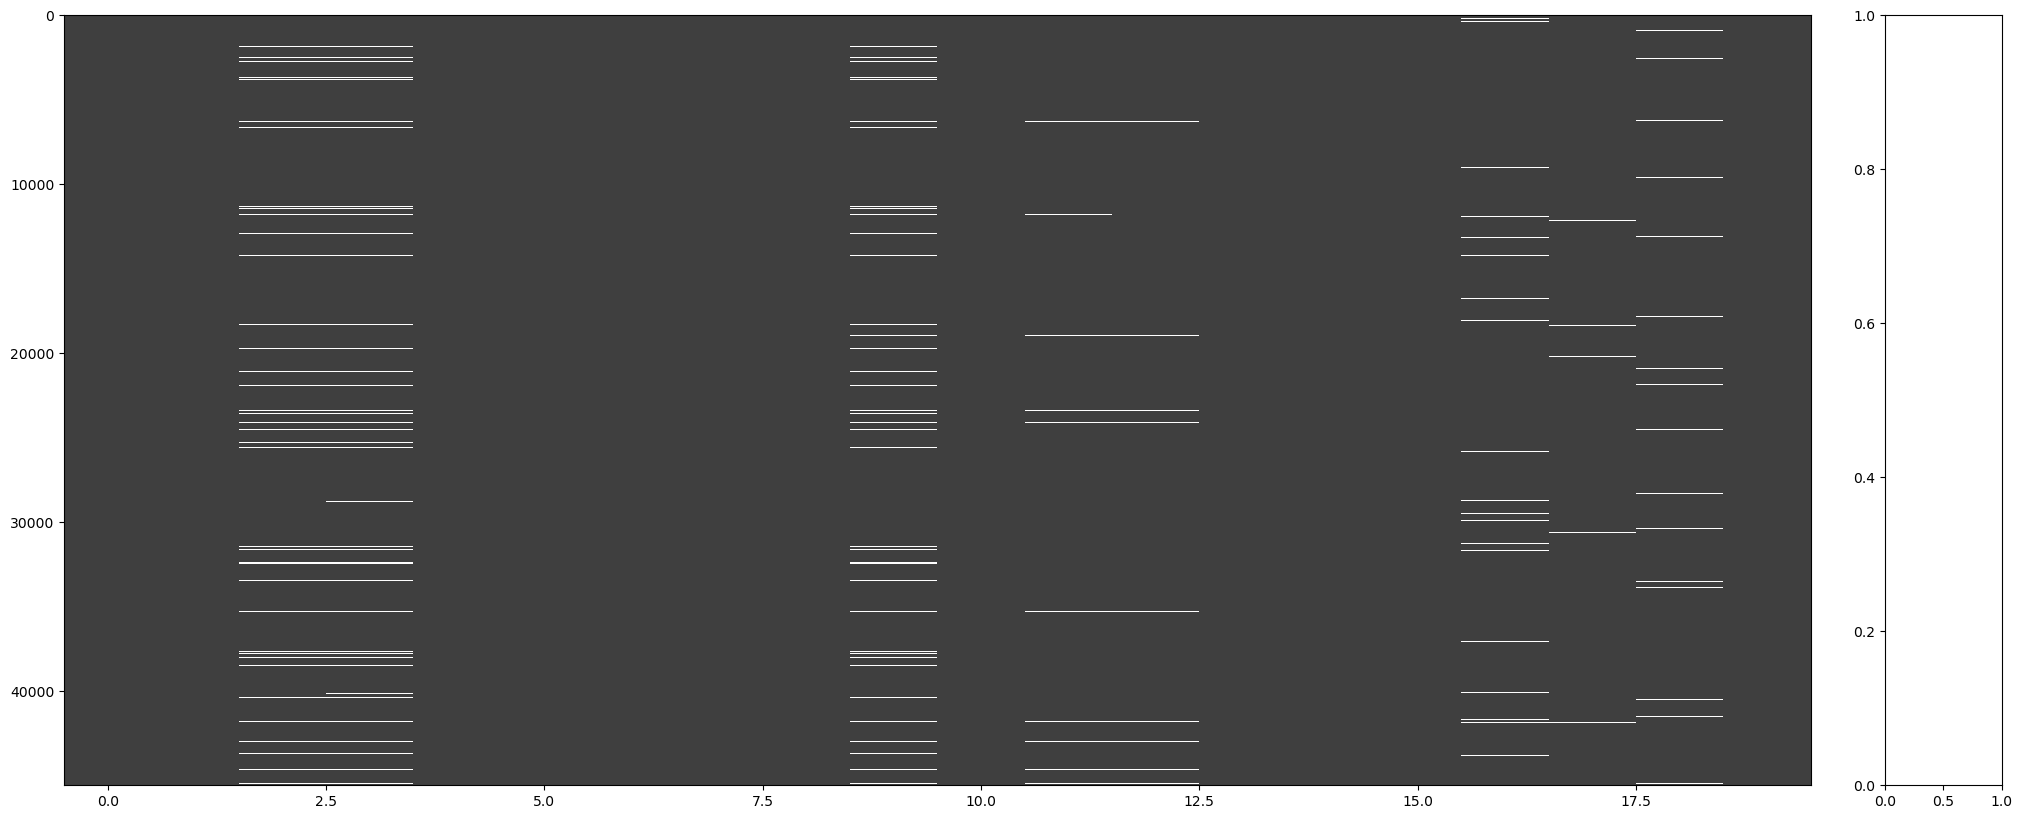

In [14]:
#missing values matrix

msno.matrix(missing_df)

<Axes: >

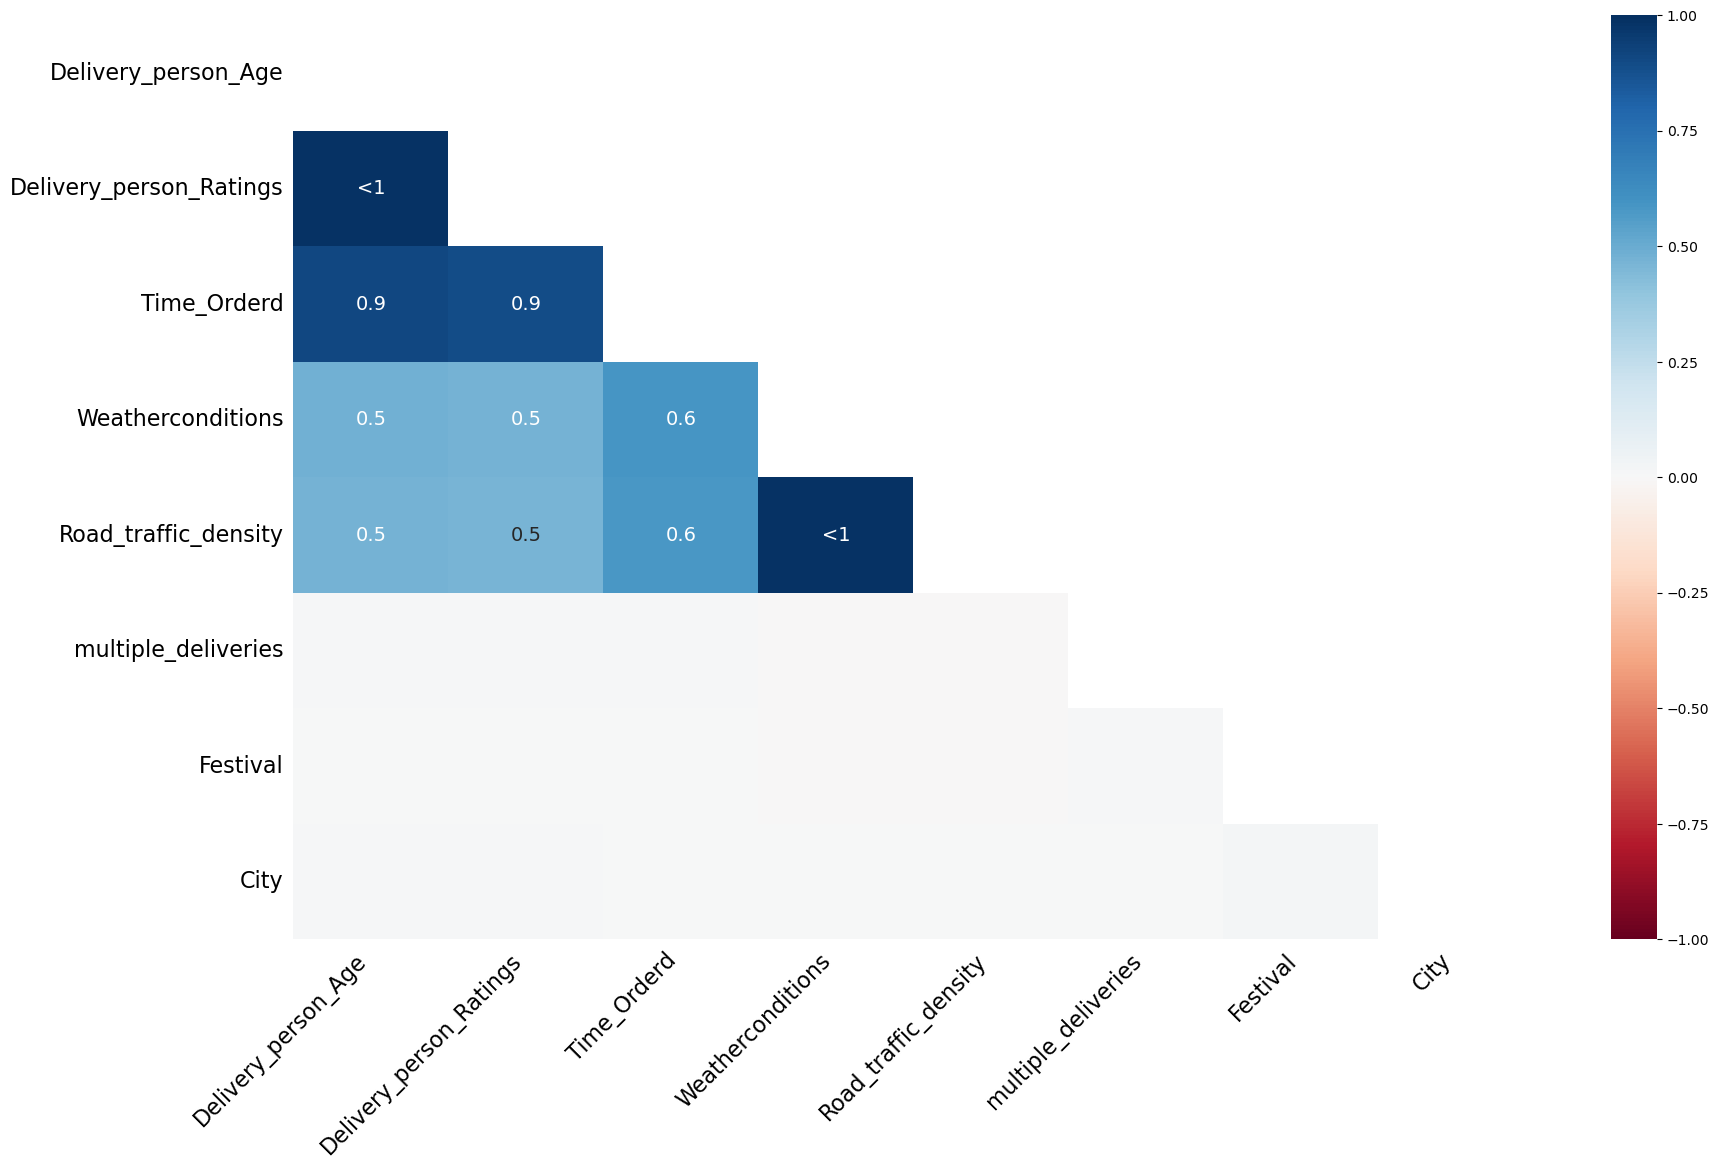

In [15]:
msno.heatmap(missing_df)

Observations

1. The delivery person columns are correleated to eachother.This means that missingness in these columns is higly related which means lack of rider data.
2. The time ordered column is also related to rider which shows that data might be missing due to some network error where the system was unable to log rider details and time of order.
3. There is high correlation between weather patterns and road traffic information. Be clear that this does not mean the road traffic and weather columns are correlated.High corr in missingness means that if value in one column is missing,it is a high chance that it will be missing in others as well.
4. Road traffic density also shows correlation to the rider as it might be provided through the phone of rider(need to investigate).

In [16]:
#percentage of rows in the dataset having missing values

(missing_df.isna().any(axis=1).sum()/missing_df.shape[0])*100


9.266773408198627

In [17]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [18]:
df.drop(columns=['ID','Delivery_person_ID']).duplicated().sum()

0

There are no duplicate rows in the data

In [19]:
#check any unique items in the column ID

print(f"There are {df['ID'].nunique()} unique values in the ID column")

There are 45593 unique values in the ID column


All the values of ID column are unique hence droping this ID column.

In [20]:
print(f"There are {df['Delivery_person_ID'].nunique()} unique values in the Rider column")

There are 1320 unique values in the Rider column


In [21]:
df['Delivery_person_ID'].value_counts()

Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: count, Length: 1320, dtype: int64

In [22]:
df['Delivery_person_ID'].str.split('RES').str[0].rename('City_name')

0          INDO
1          BANG
2          BANG
3         COIMB
4          CHEN
          ...  
45588       JAP
45589       AGR
45590      CHEN
45591     COIMB
45592    RANCHI
Name: City_name, Length: 45593, dtype: object

AGE COLUMNS

In [23]:
df['Delivery_person_Age'].astype(float).describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

<Axes: ylabel='Delivery_person_Age'>

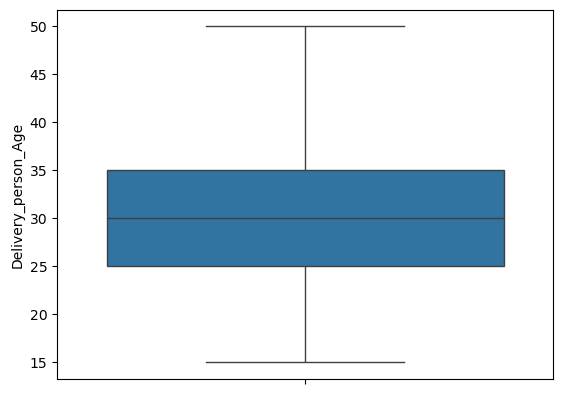

In [24]:
sns.boxplot(df['Delivery_person_Age'].astype(float))

In [25]:
#Checking rows where age is < 18
minor_data=df.loc[df['Delivery_person_Age'].astype(float)<18]
minor_data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,conditions NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


observations
1. The star rating is 1
2. The vechile condition is very bad
3. No weather and traffic conditions avaiable
4. Age of all riders is 15 and minor
5. latitude nad longitude is negative, zero and it is not possible as india latitude is not negative or zero
6. Seems like removing it far better as lot of missing data present.

In [26]:
#minor idex
minor_index=minor_data.index.tolist()
len(minor_index)

38

RATINGS COLUMN CLEANING

In [27]:
df['Delivery_person_Ratings'].astype(float).describe()

count    43685.000000
mean         4.633780
std          0.334716
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: Delivery_person_Ratings, dtype: float64

observations
1. max is 6 rating and 75% resides 4.9 rating

<Axes: ylabel='Delivery_person_Ratings'>

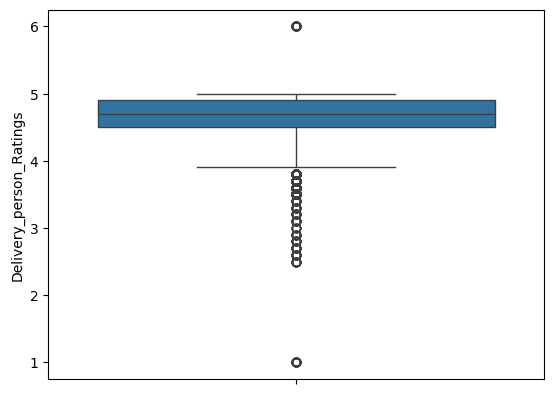

In [28]:
sns.boxplot(df['Delivery_person_Ratings'].astype(float))

Lets check 6 rating (how many colums are there)

In [29]:
six_star_data=df.loc[df['Delivery_person_Ratings']=="6"]
len(six_star_data)

53

Checking the data there is same issue as minor data and majority values are missing.

In [30]:
six_star_index=six_star_data.index.tolist()
len(six_star_index)

53

LOCATION COLUMNS CLEANING

In [31]:
location_colums=df.columns[4:8].tolist()
location_colums

['Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude']

In [32]:
location_subset=df.loc[:,location_colums]
location_subset

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


Valid values for india lat and longitude 
India lies to the north of the equator between 6°44' to 35°30' north latitude and 68°7' east to 97°25' east longitude

In [33]:
#stats summary 
location_subset.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [34]:
#set lower bound and upper bound
lower_bound_lat=6.44
lower_bound_long=68.70

In [35]:
#rows of data where latitude and longitude values are below the bounds
df.loc[
      (df['Restaurant_latitude']<lower_bound_lat)|(df['Restaurant_longitude']<lower_bound_long)|(df['Delivery_location_latitude']<lower_bound_lat)|(df['Delivery_location_longitude']<lower_bound_long)
      ].sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
20060,0x1a71,VADRES09DEL01,24,4.8,0.000000,0.000000,0.010000,0.010000,07-03-2022,10:55:00,11:10:00,conditions Fog,Low,1,Drinks,scooter,0,No,Urban,(min) 13
11668,0x43c5,RANCHIRES14DEL01,28,4.8,0.000000,0.000000,0.110000,0.110000,16-03-2022,18:50:00,19:05:00,conditions Stormy,Medium,0,Meal,motorcycle,1,No,Metropolitian,(min) 31
25518,0x17d1,MYSRES14DEL02,33,4.3,0.000000,0.000000,0.020000,0.020000,13-03-2022,11:35:00,11:50:00,conditions Stormy,High,0,Drinks,motorcycle,1,No,Metropolitian,(min) 48
8813,0x32fd,RANCHIRES03DEL02,24,4.7,0.000000,0.000000,0.020000,0.020000,03-03-2022,10:25:00,10:35:00,conditions Sunny,Low,2,Drinks,electric_scooter,1,No,Metropolitian,(min) 21
40290,0xd018,BHPRES07DEL03,28,4.8,0.000000,0.000000,0.030000,0.030000,11-02-2022,23:25:00,23:30:00,conditions Sandstorms,Low,1,Drinks,scooter,NaN,No,Metropolitian,(min) 13
22845,0x93ab,VADRES15DEL02,28,4.6,0.000000,0.000000,0.050000,0.050000,15-03-2022,23:40:00,23:50:00,conditions Windy,Low,2,Meal,scooter,1,No,Metropolitian,(min) 14
20279,0x87f5,VADRES16DEL03,30,4.2,0.000000,0.000000,0.090000,0.090000,04-03-2022,19:25:00,19:30:00,conditions Stormy,Jam,2,Drinks,electric_scooter,2,No,Metropolitian,(min) 32
7636,0xd3e0,AURGRES11DEL02,20,4.8,0.000000,0.000000,0.050000,0.050000,13-02-2022,22:40:00,22:50:00,conditions Sandstorms,Low,2,Meal,motorcycle,0,No,Urban,(min) 10
42686,0x652a,MYSRES14DEL01,35,4.8,0.000000,0.000000,0.010000,0.010000,15-03-2022,08:35:00,08:40:00,conditions Sunny,Low,0,Drinks,motorcycle,0,No,Metropolitian,(min) 24
20901,0xb02e,VADRES12DEL03,35,4.6,0.000000,0.000000,0.090000,0.090000,02-04-2022,18:20:00,18:25:00,conditions Sandstorms,Medium,0,Snack,motorcycle,1,No,Metropolitian,(min) 32


In [36]:
location_subset.loc[
      (location_subset['Restaurant_latitude']<lower_bound_lat)|
      (location_subset['Restaurant_longitude']<lower_bound_long)|
      (location_subset['Delivery_location_latitude']<lower_bound_lat)|
      (location_subset['Delivery_location_longitude']<lower_bound_long)
      ].shape[0]

4071

There are 4071 rows in the data where lat long values are messy

In [37]:
location_subset.loc[
      (location_subset['Restaurant_latitude']<lower_bound_lat)|
      (location_subset['Restaurant_longitude']<lower_bound_long)|
      (location_subset['Delivery_location_latitude']<lower_bound_lat)|
      (location_subset['Delivery_location_longitude']<lower_bound_long)
      ].describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,-2.149416,2.068601,2.212538,8.299885
std,6.537913,25.270676,6.538283,23.980011
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'Restaurant_latitude'),
  Text(2, 0, 'Restaurant_longitude'),
  Text(3, 0, 'Delivery_location_latitude'),
  Text(4, 0, 'Delivery_location_longitude')])

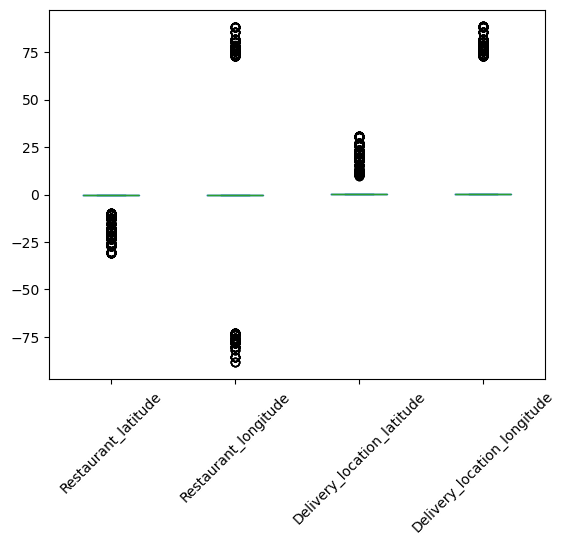

In [38]:
#boxplot for all the anamolies
location_subset.loc[
      (location_subset['Restaurant_latitude']<lower_bound_lat)|
      (location_subset['Restaurant_longitude']<lower_bound_long)|
      (location_subset['Delivery_location_latitude']<lower_bound_lat)|
      (location_subset['Delivery_location_longitude']<lower_bound_long)
      ].plot(kind='box')
plt.xticks(rotation=45)

Negative values are correct just we have to take absolute


[Text(1, 0, 'Restaurant_latitude'),
 Text(2, 0, 'Restaurant_longitude'),
 Text(3, 0, 'Delivery_location_latitude'),
 Text(4, 0, 'Delivery_location_longitude')]

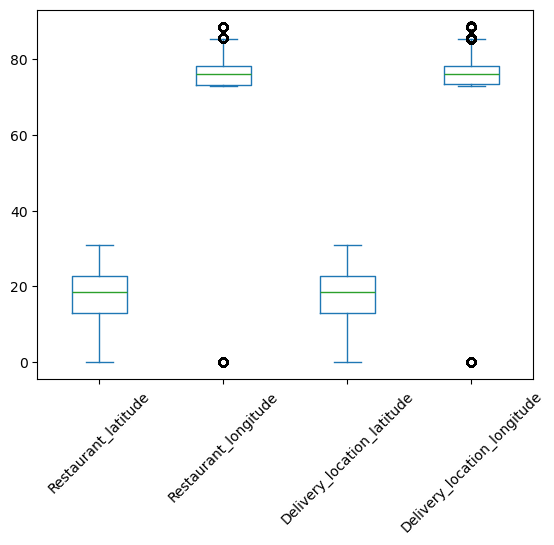

In [39]:
#taking absolute values
location_subset.abs().plot(kind='box')
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [40]:
location_subset.abs().loc[lambda df_:
      (df_['Restaurant_latitude']<lower_bound_lat)|
      (df_['Restaurant_longitude']<lower_bound_long)|
      (df_['Delivery_location_latitude']<lower_bound_lat)|
      (df_['Delivery_location_longitude']<lower_bound_long)
      ].shape[0]

3640

Still 3640 rows in the data is messy lat long values

In [41]:
location_subset.abs().loc[lambda df_:
      (df_['Restaurant_latitude']<1)|
      (df_['Restaurant_longitude']<1)|
      (df_['Delivery_location_latitude']<1)|
      (df_['Delivery_location_longitude']<1)
      ]

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [42]:
def clean_lat_long(data: pd.DataFrame,threshold=1):
    location_columns=location_subset.columns.tolist()

    return (
        data.assign(**{col:(np.where(data[col]<threshold,np.NaN,data[col].values))
        for col in location_columns
                      })
    )




In [43]:
clean_lat_long(df).isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude            4071
Restaurant_longitude           3802
Delivery_location_latitude     3640
Delivery_location_longitude    3640
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

ORDER DATE

In [44]:
#Check the missing values
df['Order_Date'].isnull().sum()

0

In [45]:
df['Order_Date'].unique()


array(['19-03-2022', '25-03-2022', '05-04-2022', '26-03-2022',
       '11-03-2022', '04-03-2022', '14-03-2022', '20-03-2022',
       '12-02-2022', '13-02-2022', '14-02-2022', '02-04-2022',
       '01-03-2022', '16-03-2022', '15-02-2022', '10-03-2022',
       '27-03-2022', '12-03-2022', '01-04-2022', '05-03-2022',
       '11-02-2022', '08-03-2022', '03-04-2022', '30-03-2022',
       '28-03-2022', '18-03-2022', '06-04-2022', '04-04-2022',
       '24-03-2022', '09-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [46]:
#extract_datetime_features

def extract_datetime_features(ser):
    date_col=pd.to_datetime(ser,dayfirst=True)

    return(
        pd.DataFrame(
              {
                  "day":date_col.dt.day,
                  "month":date_col.dt.month,
                  "year":date_col.dt.year,
                  "day_of_week":date_col.dt.day_name(),
                  "is_weekend":date_col.dt.day_name().isin(["Saturday","Sunday"]).astype(int)
              }
        )
    )

In [47]:
extract_datetime_features(df['Order_Date'])

,day,month,year,day_of_week,is_weekend
0,19,3,2022,Saturday,1
1,25,3,2022,Friday,0
2,19,3,2022,Saturday,1
3,5,4,2022,Tuesday,0
4,26,3,2022,Saturday,1
...,...,...,...,...,...
45588,24,3,2022,Thursday,0
45589,16,2,2022,Wednesday,0
45590,11,3,2022,Friday,0
45591,7,3,2022,Monday,0


Time_order

In [64]:
#extract hour info from data
order_time_hr =pd.to_datetime(df.replace("NaN ",np.NaN)['Time_Orderd'],format='mixed').dt.hour
order_time_hr

0        11.0
1        19.0
2         8.0
3        18.0
4        13.0
         ... 
45588    11.0
45589    19.0
45590    23.0
45591    13.0
45592    17.0
Name: Time_Orderd, Length: 45593, dtype: float64

In [69]:
def time_of_day(ser):
    time_col = pd.to_datetime(ser,format='mixed').dt.hour

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                           (ser.between(12,17,inclusive='left')),
                           (ser.between(17,20,inclusive='left')),
                           (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [70]:
time_subset=df.loc[:,["Time_Orderd",'Time_Order_picked']]
time_subset

,Time_Orderd,Time_Order_picked
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [71]:
time_subset.columns.to_list()

['Time_Orderd', 'Time_Order_picked']

In [72]:
#calculate pickup time

(
    time_subset
    .assign(**{
        col: pd.to_datetime(time_subset[col].replace("NaN ",np.NaN).dropna(),format="mixed")
        for col in time_subset.columns.tolist()
    })
    .assign(
        pickup_time = lambda x: (x['Time_Order_picked'] - x['Time_Orderd']).dt.seconds / 60,
        order_time_hour = lambda x: x['Time_Orderd'].dt.hour,
        order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
    )
    .drop(columns=["Time_Orderd","Time_Order_picked"])
)

,pickup_time,order_time_hour,order_time_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,15.0,23.0,night
45591,5.0,13.0,afternoon


WEATHER COLUMNS CLEANING

In [85]:
df['Weatherconditions'].value_counts()

Weatherconditions
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

In [86]:
#remove conditions from values
df['Weatherconditions'].str.replace("conditions","").unique()

array([' Sunny', ' Stormy', ' Sandstorms', ' Cloudy', ' Fog', ' Windy',
       ' NaN'], dtype=object)

TRAFFIC CLEANING

In [87]:
df['Road_traffic_density'].value_counts()

Road_traffic_density
Low        15477
Jam        14143
Medium     10947
High        4425
NaN          601
Name: count, dtype: int64

In [88]:
df['Road_traffic_density'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [89]:
df['Road_traffic_density'].replace("NaN ",np.NaN).str.rstrip().str.lower().unique()

array(['high', 'jam', 'low', 'medium', nan], dtype=object)

In [ ]:
VECHILE CONDITIONS

In [90]:
df['Vehicle_condition'].unique()

array([2, 0, 1, 3], dtype=int64)

In [ ]:
TYPE OF ORDER CLEANING

In [91]:
df['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [92]:
df['Type_of_order'].str.rstrip().str.lower().unique()

array(['snack', 'drinks', 'buffet', 'meal'], dtype=object)

Type_of_vehicle cleaning

In [93]:
#Value_counts
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64

In [94]:
df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [95]:
df['Type_of_vehicle'].str.rstrip().str.lower().unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

multiple_deliveries Cleaning

In [96]:
df['multiple_deliveries'].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

In [101]:
df['multiple_deliveries'].replace('NaN ',np.NaN).astype(float).unique()

array([ 0.,  1.,  3., nan,  2.])

Festival Cleaning

In [103]:
df['Festival'].unique()

array(['No ', 'Yes ', 'NaN '], dtype=object)

In [105]:
df['Festival'].replace("NaN ",np.NaN).str.rstrip().unique()

array(['No', 'Yes', nan], dtype=object)

Time_taken(min) cleaning

In [107]:
df['Time_taken(min)'].dtype

dtype('O')

In [108]:
df['Time_taken(min)'].str.replace("(min) ","").astype(int)

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int32

In [48]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [121]:
def data_cleaning(data: pd.DataFrame):

    return (
        data
        .drop(columns='ID')
        .drop(index=minor_index)
        .drop(index=six_star_index)
        .replace("NaN ",np.NaN)
        .assign(
            #city columns out of Delivery_person_ID
            city_name=lambda x:x['Delivery_person_ID'].str.split('RES').str[0],
            #convert age to float
            age=lambda x:x['Delivery_person_Age'].astype(float),
            #convert ratings to float
            ratings=lambda x:x['Delivery_person_Ratings'].astype(float),
            #absolute values for location based columns
            Restaurant_latitude=lambda x:x['Restaurant_latitude'].abs(),
            Restaurant_longitude=lambda x:x['Restaurant_longitude'].abs(),
            delivery_latitude=lambda x:x['Delivery_location_latitude'].abs(),
            delivery_longitude=lambda x:x['Delivery_location_longitude'].abs(),
            #order date to date time and feature extraction
            order_date=lambda x:pd.to_datetime(x['Order_Date'],dayfirst=True),
        )
            .assign(
            order_day=lambda x: x['order_date'].dt.day,
            order_month=lambda x: x['order_date'].dt.month,
            order_day_of_week=lambda x: x['order_date'].dt.day_name().str.lower(),
            # Correctly check for weekend and convert boolean to int (1 or 0)
            is_weekend=lambda x: x['order_date'].dt.day_name().isin(['Saturday', 'Sunday']).astype(int),
            )
            # time based columns
            .assign(
            order_time = lambda x: pd.to_datetime(x['Time_Orderd'], format='mixed', errors='coerce'),
            order_picked_time = lambda x: pd.to_datetime(x['Time_Order_picked'], format='mixed', errors='coerce'),
            )

           .assign(
            pickup_time_minutes = lambda x: (x['order_picked_time'] - x['order_time']).dt.total_seconds() / 60,
            order_time_hour = lambda x: x['order_time'].dt.hour,
           )
    
           .assign(
            order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day),
           )
           .assign(
           # categorical columns
           weather = lambda x: x['Weatherconditions'].str.replace("conditions ", "").str.lower().replace("nan", np.NaN),
           traffic = lambda x:x['Road_traffic_density'].str.rstrip().str.lower(),
           type_of_order = lambda x: x['Type_of_order'].str.rstrip().str.lower(),
           type_of_vehicle = lambda x: x['Type_of_vehicle'].str.rstrip().str.lower(),
           festival = lambda x: x['Festival'].str.rstrip().str.lower(),
           city_type = lambda x: x['City'].str.rstrip().str.lower(),
           # multiple deliveries column
           multiple_deliveries = lambda x: x['multiple_deliveries'].astype(float),
           # target column modifications
           time_taken = lambda x: (df['Time_taken(min)'].str.replace("(min) ", "").astype(int)).drop(columns=["order_time", "order_picked_time"]),
         )
    )


            

            
    

In [122]:
data_cleaning(df)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,pickup_time_minutes,order_time_hour,order_time_of_day,weather,traffic,type_of_order,type_of_vehicle,festival,city_type,time_taken
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,...,15.0,11.0,morning,sunny,high,snack,motorcycle,no,urban,24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,...,5.0,19.0,evening,stormy,jam,snack,scooter,no,metropolitian,33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,...,15.0,8.0,morning,sandstorms,low,drinks,motorcycle,no,urban,26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,...,10.0,18.0,evening,sunny,medium,buffet,motorcycle,no,metropolitian,21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,...,15.0,13.0,afternoon,cloudy,high,snack,scooter,no,metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,...,10.0,11.0,morning,windy,high,meal,motorcycle,no,metropolitian,32
45589,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,...,15.0,19.0,evening,windy,jam,buffet,motorcycle,no,metropolitian,36
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,...,-1425.0,23.0,night,cloudy,low,drinks,scooter,no,metropolitian,16
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,...,5.0,13.0,afternoon,cloudy,high,snack,motorcycle,no,metropolitian,26


In [123]:
def calculate_haversine_distance(df):
    location_columns = location_subset.columns.tolist()
    
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Haversine formula calculation
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    
    distance = 6371 * c

    return (
        df.assign(
           distance = distance
        )
    )

In [124]:
#add more data cleaning steps

cleaned_data=df.pipe(data_cleaning).pipe(clean_lat_long).pipe(calculate_haversine_distance)

cleaned_data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,order_time_hour,order_time_of_day,weather,traffic,type_of_order,type_of_vehicle,festival,city_type,time_taken,distance
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,...,11.0,morning,sunny,high,snack,motorcycle,no,urban,24,3.025149
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,...,19.0,evening,stormy,jam,snack,scooter,no,metropolitian,33,20.183530
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,...,8.0,morning,sandstorms,low,drinks,motorcycle,no,urban,26,1.552758
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,...,18.0,evening,sunny,medium,buffet,motorcycle,no,metropolitian,21,7.790401
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,...,13.0,afternoon,cloudy,high,snack,scooter,no,metropolitian,30,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,...,11.0,morning,windy,high,meal,motorcycle,no,metropolitian,32,1.489846
45589,AGRRES16DEL01,21,4.6,NaN,NaN,NaN,NaN,16-02-2022,19:55:00,20:10:00,...,19.0,evening,windy,jam,buffet,motorcycle,no,metropolitian,36,NaN
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,...,23.0,night,cloudy,low,drinks,scooter,no,metropolitian,16,4.657195
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,...,13.0,afternoon,cloudy,high,snack,motorcycle,no,metropolitian,26,6.232393


Validate the cleaning of data

<Axes: >

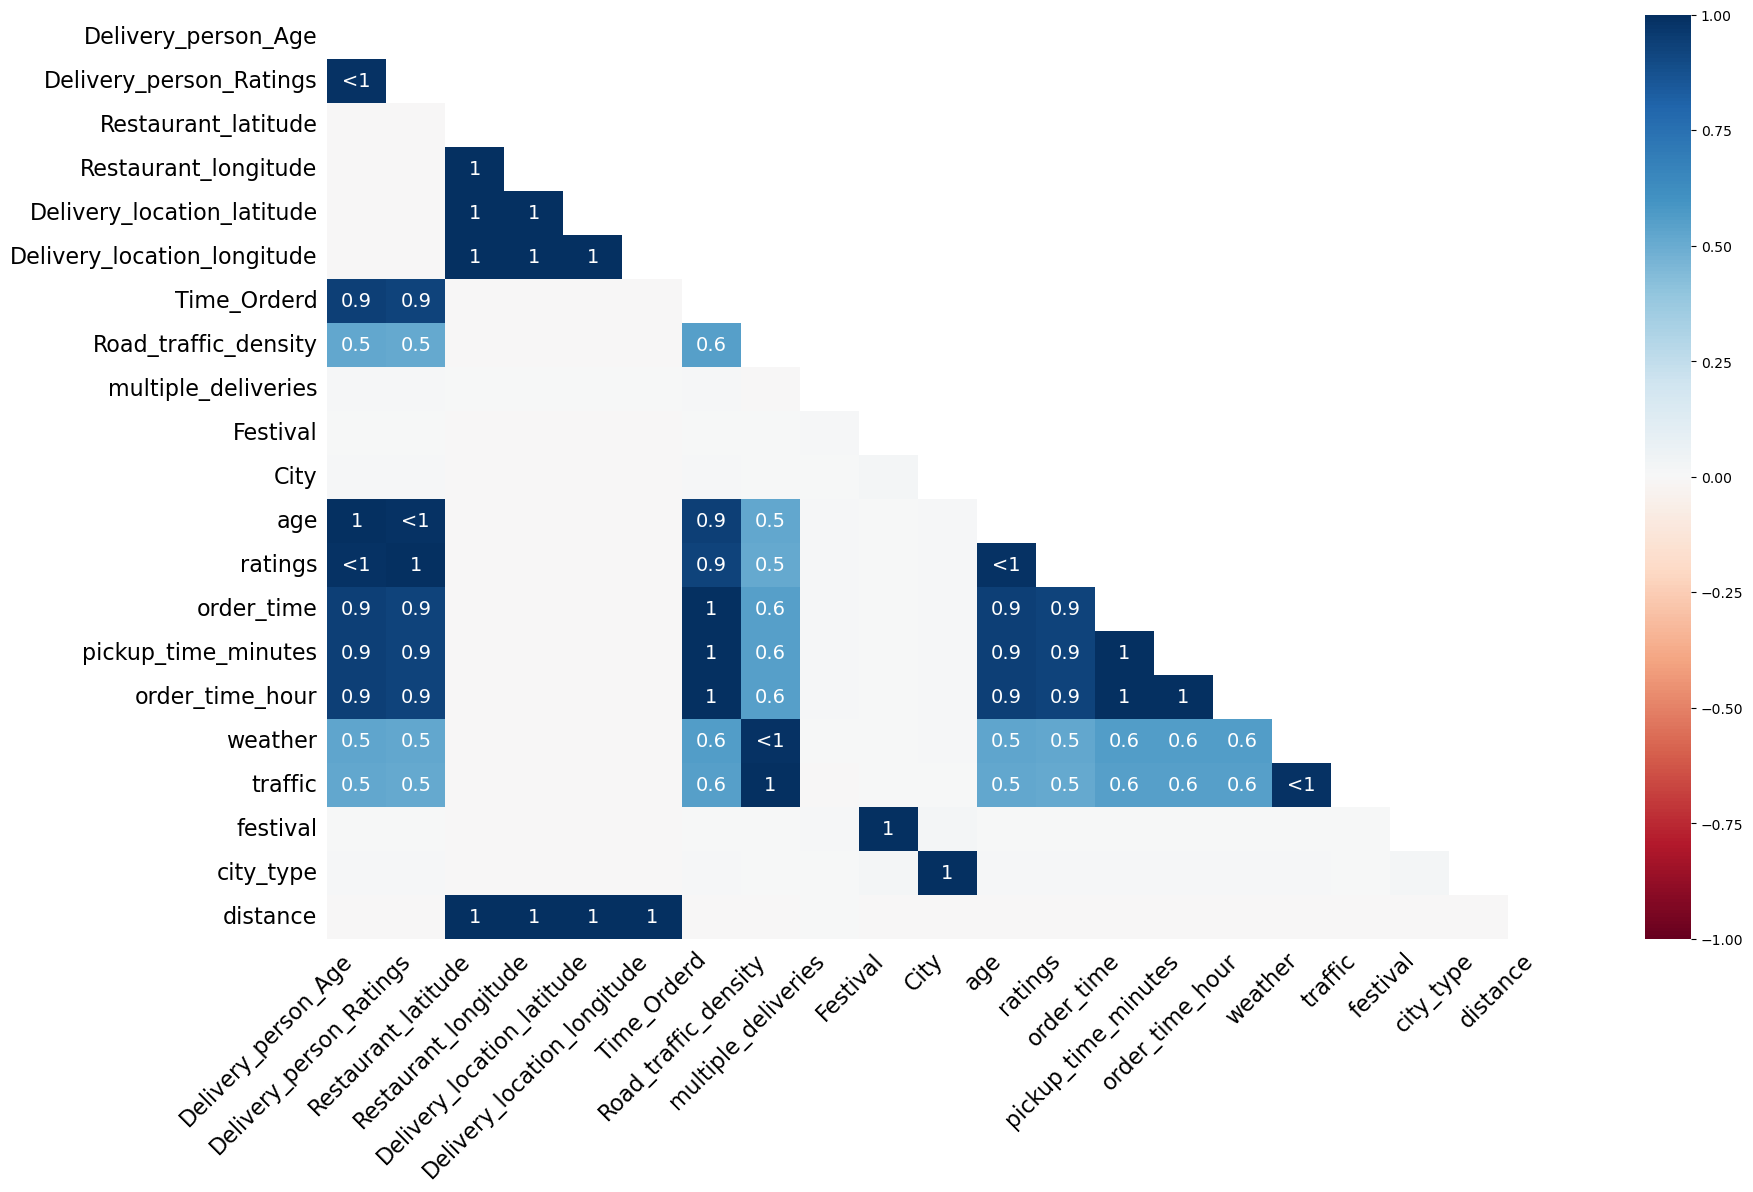

In [125]:
msno.heatmap(cleaned_data)

In [128]:
cleaned_data.to_csv('cleaned_dataswiggy.csv',index=False)


In [134]:
a=pd.read_csv('cleaned_dataswiggy.csv')
a.columns
a.drop(columns=['Time_Order_picked','Time_Orderd','Weatherconditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City','Time_taken(min)'],inplace=True)

In [135]:
a.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Vehicle_condition', 'multiple_deliveries', 'city_name',
       'age', 'ratings', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_day', 'order_month', 'order_day_of_week',
       'is_weekend', 'order_time', 'order_picked_time', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'weather', 'traffic',
       'type_of_order', 'type_of_vehicle', 'festival', 'city_type',
       'time_taken', 'distance'],
      dtype='object')

In [136]:
a.drop(columns=['Delivery_location_longitude','Delivery_location_latitude'],inplace=True)

In [137]:
a.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude', 'Order_Date',
       'Vehicle_condition', 'multiple_deliveries', 'city_name', 'age',
       'ratings', 'delivery_latitude', 'delivery_longitude', 'order_date',
       'order_day', 'order_month', 'order_day_of_week', 'is_weekend',
       'order_time', 'order_picked_time', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'weather', 'traffic',
       'type_of_order', 'type_of_vehicle', 'festival', 'city_type',
       'time_taken', 'distance'],
      dtype='object')

In [138]:
a.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Order_Date,Vehicle_condition,multiple_deliveries,city_name,age,...,order_time_hour,order_time_of_day,weather,traffic,type_of_order,type_of_vehicle,festival,city_type,time_taken,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,19-03-2022,2,0.0,INDO,37.0,...,11.0,morning,sunny,high,snack,motorcycle,no,urban,24,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,25-03-2022,2,1.0,BANG,34.0,...,19.0,evening,stormy,jam,snack,scooter,no,metropolitian,33,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,19-03-2022,0,1.0,BANG,23.0,...,8.0,morning,sandstorms,low,drinks,motorcycle,no,urban,26,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,05-04-2022,0,1.0,COIMB,38.0,...,18.0,evening,sunny,medium,buffet,motorcycle,no,metropolitian,21,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,26-03-2022,1,1.0,CHEN,32.0,...,13.0,afternoon,cloudy,high,snack,scooter,no,metropolitian,30,6.210138


In [140]:
a.drop(columns=['order_date','Order_Date','Delivery_person_Age','Delivery_person_Ratings'],inplace=True)

In [145]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Delivery_person_ID    45502 non-null  object 
 1   Restaurant_latitude   41872 non-null  float64
 2   Restaurant_longitude  41872 non-null  float64
 3   Vehicle_condition     45502 non-null  int64  
 4   multiple_deliveries   44509 non-null  float64
 5   city_name             45502 non-null  object 
 6   age                   43648 non-null  float64
 7   ratings               43594 non-null  float64
 8   delivery_latitude     45502 non-null  float64
 9   delivery_longitude    45502 non-null  float64
 10  order_day             45502 non-null  int64  
 11  order_month           45502 non-null  int64  
 12  order_day_of_week     45502 non-null  object 
 13  is_weekend            45502 non-null  int64  
 14  order_time            43862 non-null  object 
 15  order_picked_time  

<Axes: >

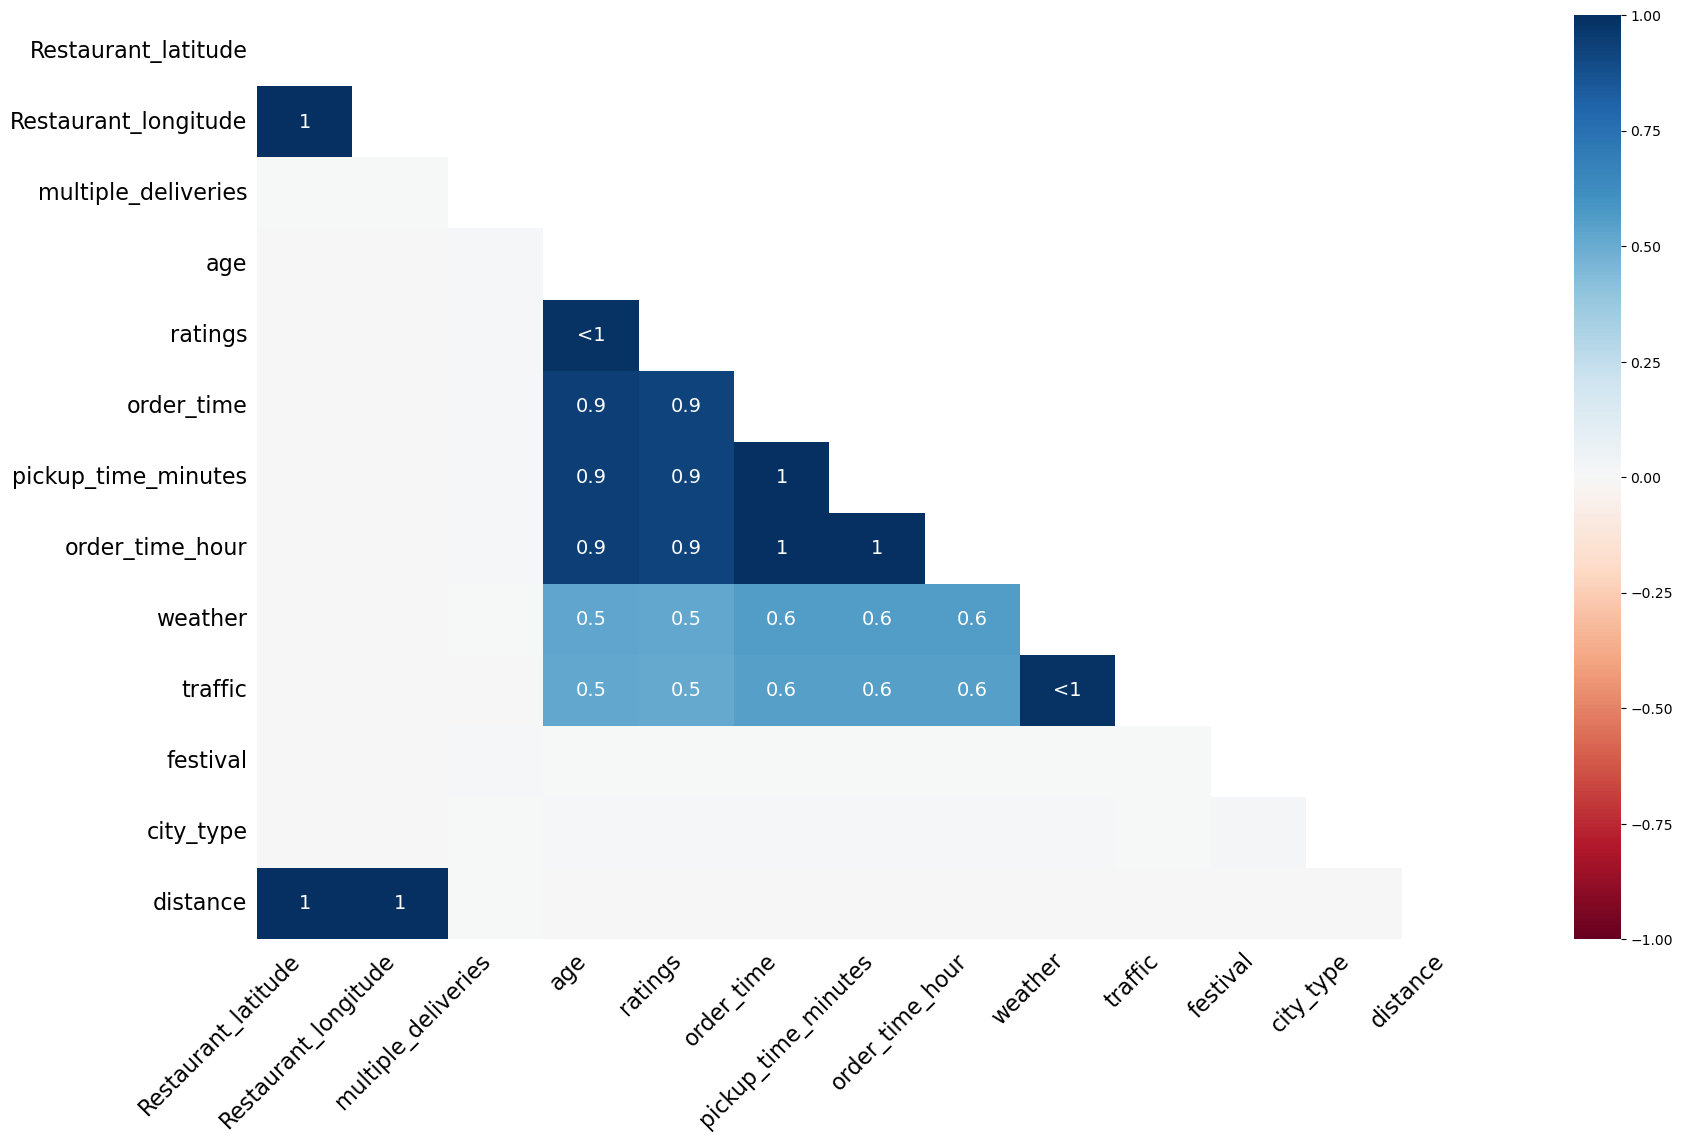

In [146]:
msno.heatmap(a)

In [147]:
a.to_csv('cleanedswiggy1.csv',index=False)